### Domain(Industry/Sector): Retail and Sales Forecasting 

### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv(r"C:\Users\Lenovo\Documents\Projects\Big Mart Sales Regression\train_v9rqX0R.csv")
test = pd.read_csv(r"C:\Users\Lenovo\Documents\Projects\Big Mart Sales Regression\test_AbJTz2l.csv")

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape, test.shape

((8523, 12), (5681, 11))

### Univariate Analysis

* Numerical Vars: Distplot
* Categorical Vars: Countplot

In [ ]:
combined.info

In [7]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Combine the Dataset
combined = pd.concat([train, test],ignore_index = True)
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [6]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [8]:
# Create a List of Numerical Columns
combined.select_dtypes(include = np.number).columns

num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
            'Item_Outlet_Sales']

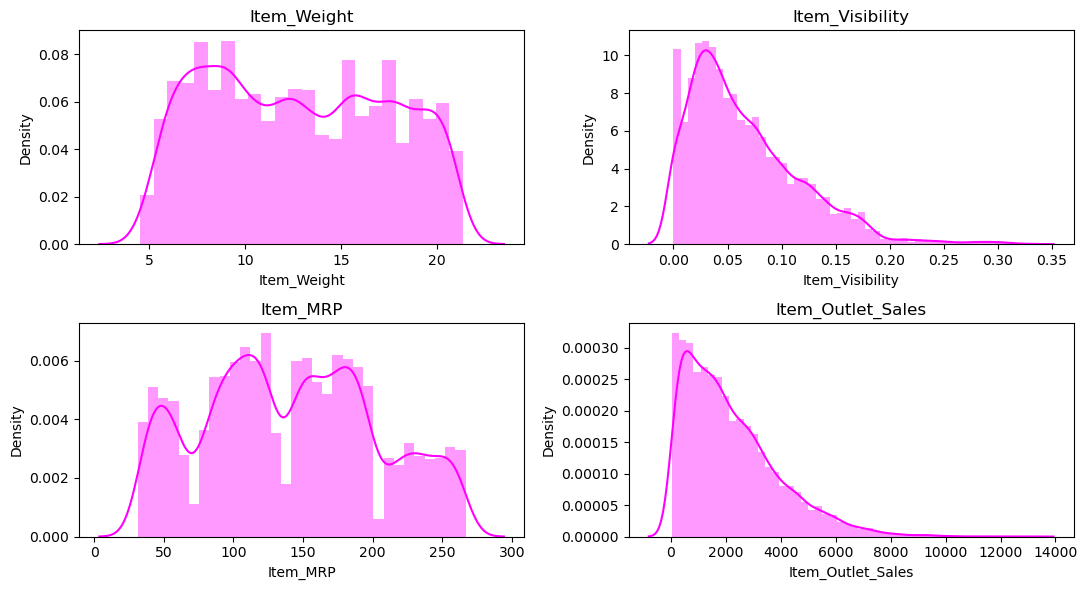

In [9]:
# Plot asthetics
nrows = 2
ncols = 2 # Basis the Columns/Features that we want to plot
iterator = 1

plt.figure(figsize = (11, 6))
for i in num_cols:
  plt.subplot(nrows, ncols, iterator)
  sns.distplot(combined.loc[:, i], color = "magenta")
  plt.title(i)
  iterator = iterator+1 # it helps us in printing the plots

plt.tight_layout() # Takes care of the presentation of multiple plots..
plt.show()

In [10]:
# Mean = Median = Mode
combined.Item_Weight.describe() # Approximately Normal

# MRP is Multimodal...Item Outlet Sales & Visibility is Highly Skewed...

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [11]:
# Categorical Vars...

combined.select_dtypes(include = "object").columns

cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

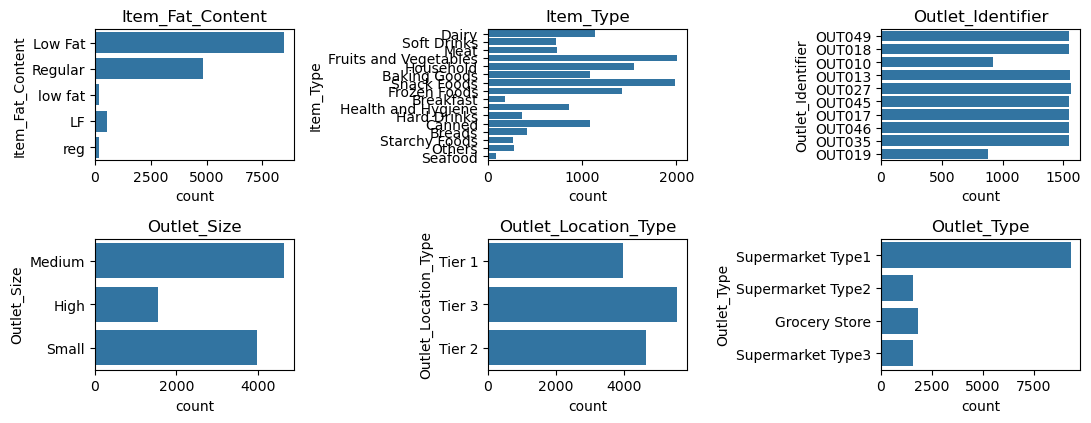

In [12]:
# Total 6 Plots

nrows = 3
ncols = 3
iterator = 1

plt.figure(figsize = (11, 6))
for i in cat_cols:
  plt.subplot(nrows, ncols, iterator)
  sns.countplot(combined.loc[:, i])
  plt.title(i)
  iterator = iterator+1

plt.tight_layout()
plt.show()

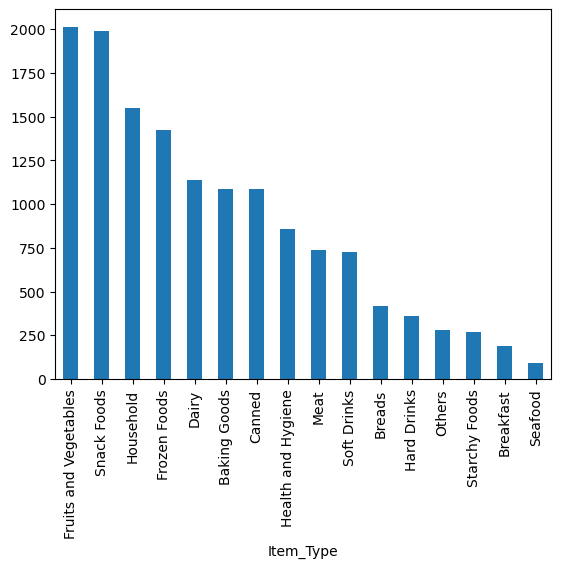

In [13]:
# Plot the Item Type & Outlet ID
combined.Item_Type.value_counts().plot(kind = "bar")
plt.show()

# Top5 Selling Items: Fruits & Veggies, Frozen Food, Dairy, Snacks & Household..

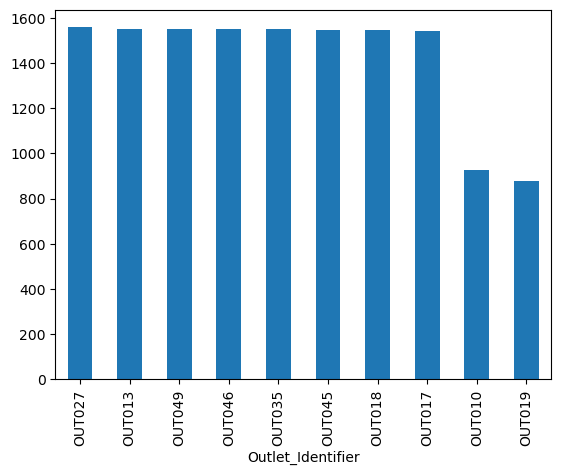

In [14]:
combined.Outlet_Identifier.value_counts().plot(kind = "bar")
plt.show()

# Top3 Outlets: Out27, Out13 & Out49

#### Summary of Univariate Analysis

* Top 5 Selling Items: Fruits & Veggies, Frozen Food, Dairy, Snacks & Household

* Top 3 Outlets: Out27, Out13 & Out49

* Sales & Visibility is Skewed.

* Weight is Normally Distributed and MRP is Multimodal Data

* Most of the Outlets in Tier 3 Cities and mostly S1.

* Outlets are Medium Sized and Most Products are Low Fat Products

### Bivariate Analysis

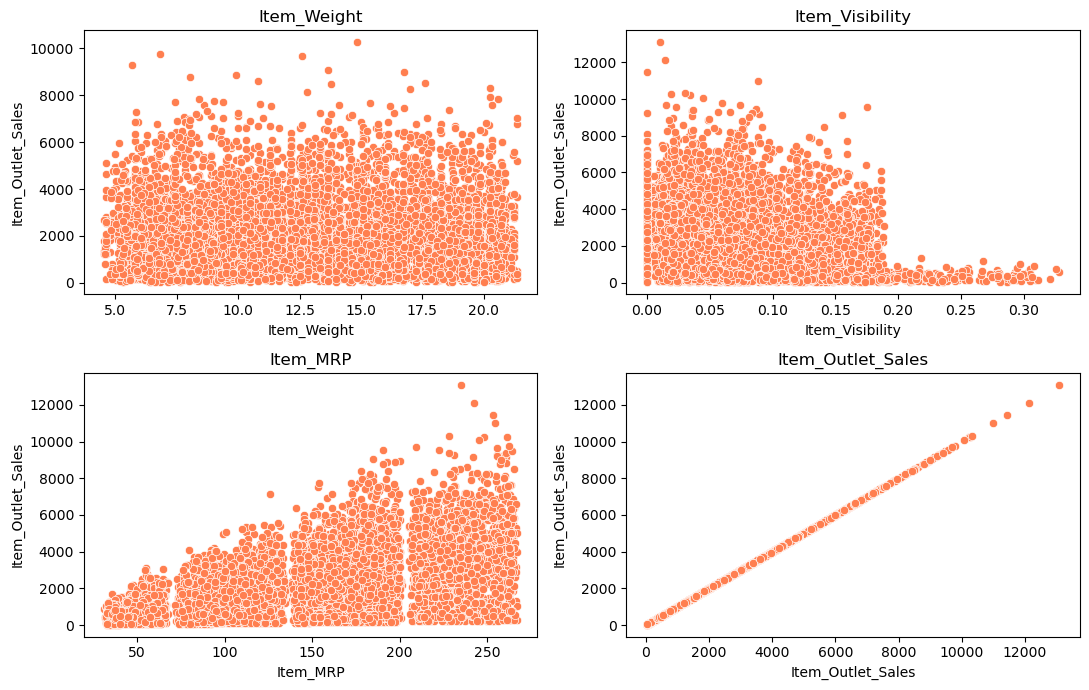

In [15]:
nrows = 2
ncols = 2
iterator = 1

plt.figure(figsize = (11, 7))

for i in num_cols:
  plt.subplot(nrows, ncols, iterator)
  sns.scatterplot(x = i, y = "Item_Outlet_Sales", data = combined,
                  color = "coral")
  plt.title(i)
  iterator = iterator+1

plt.tight_layout()
plt.show()

### Missing Values

In [16]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [17]:
# Fix the Item Fat Content
combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],
                                  value = ['Low Fat', 'Low Fat','Regular'],
                                  inplace = True)

In [18]:
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [19]:
# Look into Pattern for Item Weight ~ which categorical col should be used
# to impute the Missing Values in Weight
combined.loc[combined.Item_Weight.isnull(), :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [20]:
# Impute the Missing Value in the First Row
combined.loc[7, "Item_Weight"] = combined.loc[combined.Item_Identifier=="FDP10",
                                              "Item_Weight"].median()
combined.loc[18, "Item_Weight"] = combined.loc[combined.Item_Identifier=="DRI11",
                                              "Item_Weight"].median()

In [21]:
# Index Numbers..
rownums = combined.loc[combined.Item_Weight.isnull(), :].index
itemids = combined.loc[combined.Item_Weight.isnull(), "Item_Identifier"]

for i in rownums: # itemids[i]
   combined.loc[i, "Item_Weight"] = combined.loc[combined.Item_Identifier==itemids[i],
                                                 "Item_Weight"].median()

In [22]:
# Item Visibility ==== 00000
# Using Item Identifier We will remove the Item Visibility 0s...

combined['Item_Visibility'] = combined.groupby("Item_Identifier")["Item_Visibility"].\
transform(lambda x:x.replace(to_replace = 0, value = x.median()))

In [23]:
# Finding the Pattern Using Item Type
val  = combined.loc[combined.Item_Type=="Fruits and Vegetables",
                    "Item_Visibility"].median()

In [24]:
# Imputting the Value
combined.loc[combined.Item_Visibility==0,'Item_Visibility'] = val

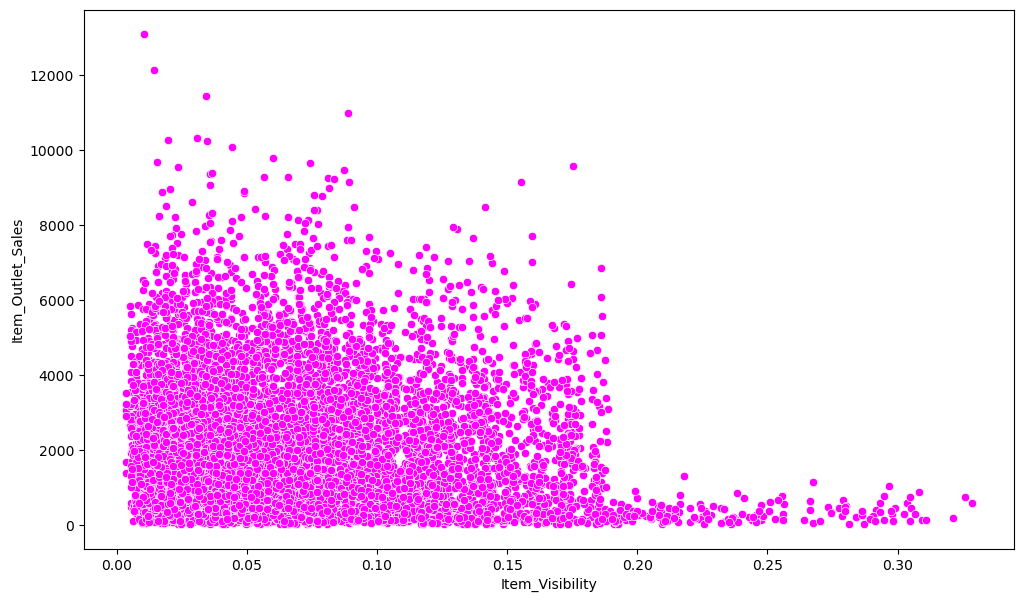

In [25]:
# Plotting the Item Visibility
plt.figure(figsize = (12, 7))
sns.scatterplot(x = "Item_Visibility", y = "Item_Outlet_Sales", data = combined,
                color = "magenta")
plt.show()

In [26]:
# Missing Values in the Data
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [27]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
combined.Outlet_Size.value_counts() # Mode: Medium

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [29]:
combined.loc[combined.Outlet_Size=="Medium", "Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT027'], dtype=object)

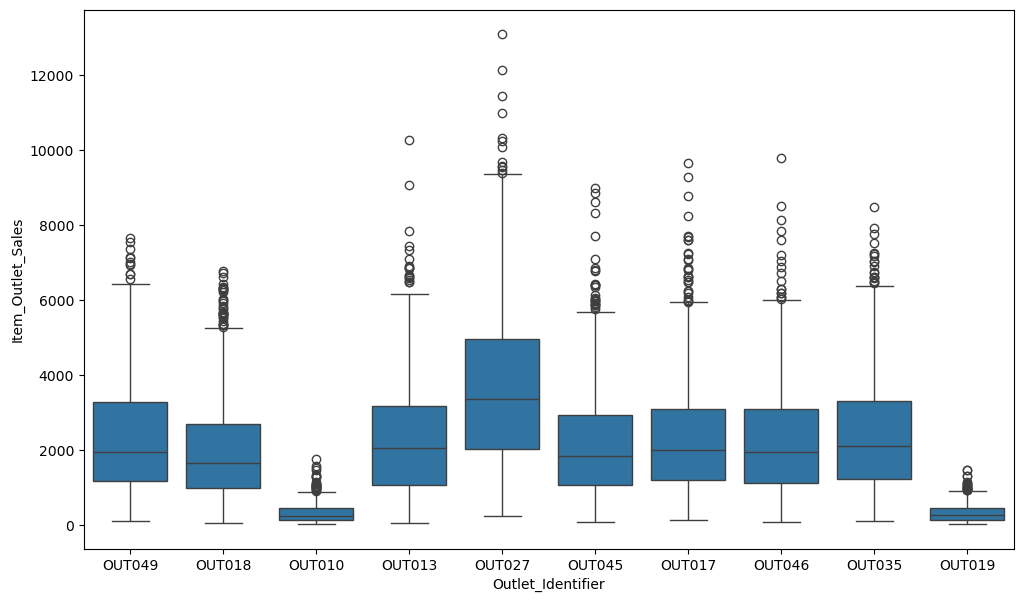

In [30]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = "Outlet_Identifier",
            y = "Item_Outlet_Sales", data = combined)
plt.show()

OUT027 is a High Profit Making Outlet

In [31]:
#combined.loc[combined.Outlet_Size.isnull(),
  #           "Outlet_Identifier"].unique()

combined.loc[combined.Outlet_Size.isnull(),
             "Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [32]:
# Generate a Truth Table
combined.groupby(["Outlet_Identifier",
                  "Outlet_Location_Type", "Outlet_Type"])["Outlet_Size"].describe()

,,,count,unique,top,freq
Outlet_Identifier,Outlet_Location_Type,Outlet_Type,,,,
OUT010,Tier 3,Grocery Store,0,0,NaN,NaN
OUT013,Tier 3,Supermarket Type1,1553,1,High,1553
OUT017,Tier 2,Supermarket Type1,0,0,NaN,NaN
OUT018,Tier 3,Supermarket Type2,1546,1,Medium,1546
OUT019,Tier 1,Grocery Store,880,1,Small,880
OUT027,Tier 3,Supermarket Type3,1559,1,Medium,1559
OUT035,Tier 2,Supermarket Type1,1550,1,Small,1550
OUT045,Tier 2,Supermarket Type1,0,0,NaN,NaN
OUT046,Tier 1,Supermarket Type1,1550,1,Small,1550


In [33]:
# Imputted Outlet Size where Type is Grocery
combined.loc[combined.Outlet_Type=="Grocery Store",
             "Outlet_Size"] = "Small"

In [34]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Location_Type"].unique()
# 45 and 17 Outlets
# Tier 2

# Imputted Outlet Size where Type is S1 in Tier 2 City
combined.loc[(combined.Outlet_Type=="Supermarket Type1") & \
 (combined.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [35]:
combined.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [36]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

### Feature Engineering

In [37]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
# Extracting food code from the Item IDs.
ids = []
for i in combined.Item_Identifier:
  ids.append(i[:2])

In [39]:
combined["Item_ID"]=pd.Series(ids)

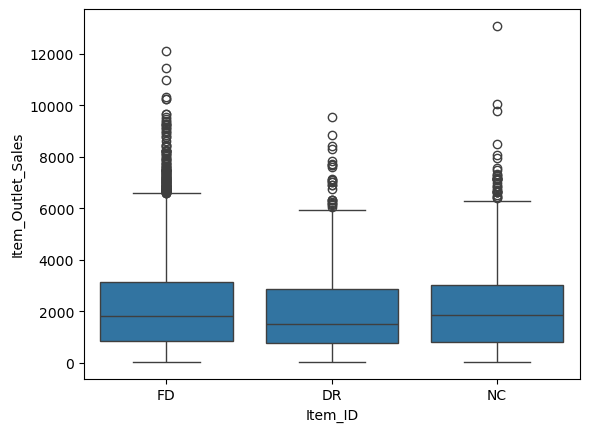

In [40]:
sns.boxplot(x = "Item_ID",
            y = "Item_Outlet_Sales", data = combined)
plt.show()

In [41]:
combined.groupby("Item_ID")["Item_Fat_Content"].describe()

,count,unique,top,freq
Item_ID,,,,
DR,1317,2,Low Fat,1208
FD,10201,2,Low Fat,5291
NC,2686,1,Low Fat,2686


In [42]:
# Where the Item ID is NC, Item Fat Content = Non_Edible

combined.loc[combined.Item_ID=='NC', "Item_Fat_Content"] = "Non_Edible"
combined.loc[combined.Item_ID=='DR', "Item_Fat_Content"] = "Low_KCal"

In [43]:
combined.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,3190.0,2198.637111,1746.275688,36.6190,846.8976,1774.6899,3103.2938,11445.1020
Low_KCal,799.0,1997.333337,1650.197412,33.2900,760.6765,1496.7184,2864.9374,9554.2300
Non_Edible,1599.0,2142.721364,1626.907672,33.2900,815.6050,1874.8928,3016.7398,13086.9648
Regular,2935.0,2233.523758,1717.167995,33.9558,866.2058,1846.9292,3211.1534,12117.5600


In [44]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

* In categorical data, if there are lots of labels/categories in that column, while treating the categorical data, it will generate as many columns as categories...

* So What, I will use Label Encoding....

* You cannot use Label Encoding because LE is used in Ordinal Variables for e.g. Shirt Size S, M and L. S vs M vs L. Thus, the Label Encoding is only Used when the Data is Ordinal in Nature.

Thus, I know that I will be able to use One Hot Encoding. Thus my data will suffer from **Curse of Dimensions**. The Curse of Dimensions mean that if there are lots of columns in the data, it means it has a very high Dimension and thus, building ML Models is quite difficult.

In [45]:
# Bin the Categories

perishables  = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Starchy Foods','Seafood']

def perish(x):
  if x in perishables:
    return "Perishables"
  else:
    return "Non_Perishables"

In [46]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(perish)

In [47]:
# Statistical Summary of all the Item Types...
combined.groupby("Item_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [48]:
# Target Encoding ~ Item Type

combined["Magic1"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("count")
combined["Magic2"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("min")
combined["Magic3"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("max")
combined["Magic4"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("mean")
combined["Magic5"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("median")
combined["Magic6"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("std")

In [49]:
# Outlet_Identifier
combined["Magic7"]=combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("count")
combined["Magic8"]=combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("min")
combined["Magic9"]=combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("max")
combined["Magic10"]=combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("mean")
combined["Magic11"]=combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("median")
combined["Magic12"]=combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("std")

In [50]:
pd.set_option('display.max_columns', 100)
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID,Item_Type_Cat,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,682,40.6138,10256.649,2232.542597,1650.8511,1884.404698,930,111.8544,7646.0472,2348.354635,1966.1074,1513.289464
1,DRC01,5.92,Low_KCal,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,445,33.2900,9554.230,2006.511735,1518.0240,1674.249752,928,69.2432,6768.5228,1995.498739,1655.1788,1375.932889


In [51]:
combined.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [52]:
best = ["OUT027", "OUT013", "OUT046"]
worst = ["OUT010", "OUT019"]

def outlets(x):
  if x in best:
    return("Best")
  elif x in worst:
    return("Worst")
  else:
    return("Average")

In [53]:
combined["Outlets_ID"] = combined.Outlet_Identifier.apply(outlets)

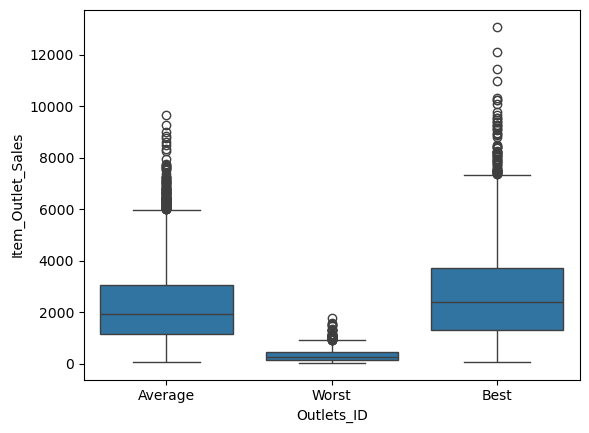

In [54]:
sns.boxplot(x = "Outlets_ID", y = "Item_Outlet_Sales", data = combined)
plt.show()

In [55]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_ID', 'Item_Type_Cat',
       'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7',
       'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12', 'Outlets_ID'],
      dtype='object')

In [56]:
new = combined.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year'], axis = 1)

In [57]:
new.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [58]:
# Split the Data into Original Train and test

newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

# Remove the Target Var from the Test Set
newtest.drop("Item_Outlet_Sales", axis = 1,
             inplace = True)

train.shape, test.shape, newtrain.shape, newtest.shape # train has n and test has n-1 cols

((8523, 12), (5681, 11), (8523, 23), (5681, 22))

### Encoding & Feature Scaling

In [59]:
# Divide the Data in X and y

# X represents input for model and y is the target/output for the model

X = newtrain.drop("Item_Outlet_Sales", axis = 1)
y = newtrain.Item_Outlet_Sales

X.columns, newtest.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_ID',
        'Item_Type_Cat', 'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5',
        'Magic6', 'Magic7', 'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12',
        'Outlets_ID'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_ID',
        'Item_Type_Cat', 'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5',
        'Magic6', 'Magic7', 'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12',
        'Outlets_ID'],
       dtype='object'))

In [60]:
# Extract the Numerical Columns
num_cols = X.select_dtypes(include = np.number).columns

In [61]:
# Scaling the train Set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in num_cols:
  X.loc[:, i] = scaler.fit_transform(pd.DataFrame(X.loc[:, i])) # Scaler learns mean and sd
  newtest.loc[:, i] = scaler.transform(pd.DataFrame(newtest.loc[:, i])) # .transform will use the mean and sd to transform test set

### Transformation

* Why Transform?

Most of the Machine Learning Models have an assumption that the Data should be Normally Distributed. For example, **Linear Regression** and **Logistic Regression** followed by KNNs are some of the model which expect the data to be Scaled and Normalized.

* This is the reason Transformation is applied on the data.

**Different Types of Transformations**

* Log Transformation/Exponential Transformation
* Log Normal Transformation (Finance)
* Square Root Transformation
* **Box Cox Transformation**
* **Yeo-Johnson Transformation**

The objective of the transformation is to make sure that the model is able to capture the pattern very well.

1.2130786409757208

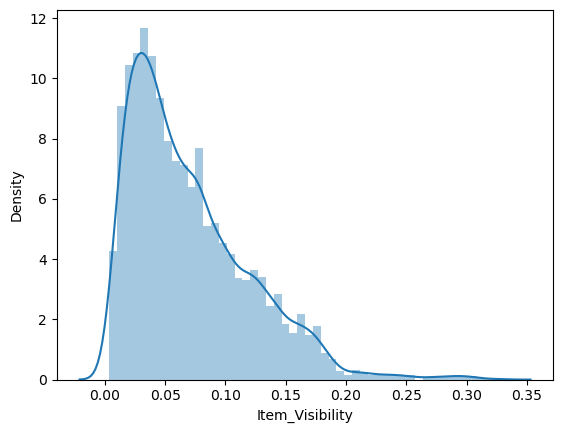

In [70]:
# Reduce the Skewness in the Data
sns.distplot(newtrain.Item_Visibility)

newtrain.Item_Visibility.skew() # Data is normal when the Skewness is 0

In [71]:
# Log Transformation
np.log(newtrain.Item_Visibility).skew() # Original Data- 1.21 | Log:-0.43319

-0.43319823861840084

<Axes: xlabel='Item_Visibility', ylabel='Density'>

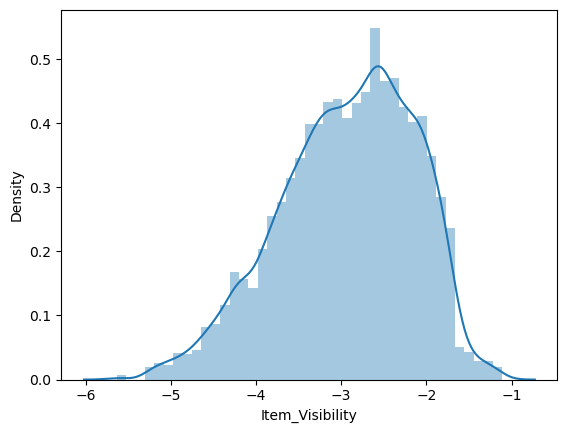

In [72]:
sns.distplot(np.log(newtrain.Item_Visibility))

<Axes: xlabel='Item_Visibility', ylabel='Density'>

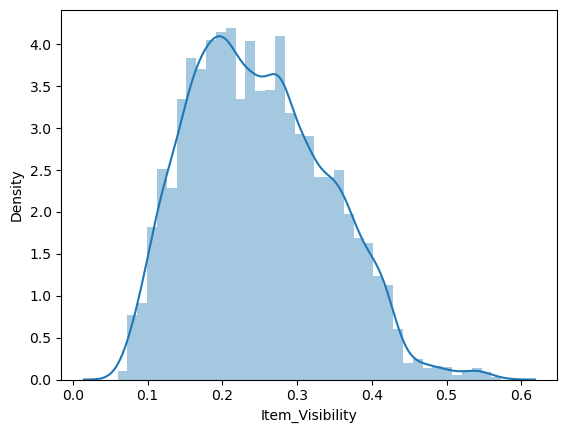

In [75]:
sns.distplot(np.sqrt(newtrain.Item_Visibility))

In [76]:
# Box Cox Transformation

from scipy.stats import boxcox

# boxcox, lambda
boxvals, lambda_val = boxcox(newtrain.Item_Visibility)

import scipy.stats as stats
stats.skew(boxvals) # Original Data- 1.21 | Box: -0.03

# Box Cox transformation works on Positive Data Only and not on -ve Data.
# Background of Box Cox involves usage of Log Function...

-0.03631709770256318

In [77]:
#sns.distplot(boxvals)
pd.DataFrame(boxvals).describe()

,0
count,8523.000000
mean,-2.093712
std,0.393353
min,-3.154667
25%,-2.385786
50%,-2.089440
75%,-1.799370
max,-0.982142


In [78]:
# Yeo Johnson

# it can handle negative values...

from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method = "yeo-johnson")
vals = power.fit_transform(pd.DataFrame(newtrain.Item_Visibility))

In [79]:
stats.skew(vals) # Original Data- 1.21 | YJ: 0.15

array([0.15407182])

### Statistical Test

* Hypothesis Tests are applied on the training data

In [82]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID,Item_Type_Cat,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,Outlets_ID
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,682,40.6138,10256.6490,2232.542597,1650.8511,1884.404698,930,111.8544,7646.0472,2348.354635,1966.1074,1513.289464,Average
1,5.92,Low_KCal,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,445,33.2900,9554.2300,2006.511735,1518.0240,1674.249752,928,69.2432,6768.5228,1995.498739,1655.1788,1375.932889,Average
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,425,47.9376,9390.4432,2158.977911,1829.6184,1695.231081,930,111.8544,7646.0472,2348.354635,1966.1074,1513.289464,Average
3,19.20,Regular,0.022914,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,1232,45.2744,12117.5600,2289.009592,1830.9500,1799.503459,555,33.2900,1775.6886,339.351662,250.3408,271.014855,Worst
4,8.93,Non_Edible,0.013177,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,910,33.2900,13086.9648,2258.784300,1981.4208,1692.245757,932,73.2380,10256.6490,2298.995256,2050.6640,1533.531664,Best


In [83]:
newtrain.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7',
       'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12'],
      dtype='object')

In [84]:
nums = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7',
       'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12']

# Num vs Num => T Test
# Ho: Predictors and Target Var are not Related/Independent.
# In Simple words, Item MRP has no relation with the Sales
# Ha: Predictors and target are related.

predictor = newtrain.loc[:, "Item_MRP"]

import scipy.stats as stats
stats.ttest_ind(predictor, newtrain.Item_Outlet_Sales)

TtestResult(statistic=-110.30476318014294, pvalue=0.0, df=17044.0)

In [85]:
pvals = []

for i in nums:
  teststats, pvalue = stats.ttest_ind(newtrain.loc[:, i],
                                      newtrain.Item_Outlet_Sales)
  pvals.append(pvalue)

In [86]:
pd.DataFrame(pvals, index = nums, columns = ["P-Values"]).\
sort_values(by = "P-Values", ascending = False) # 4 and 10

,P-Values
Magic4,1.000000e+00
Magic10,1.000000e+00
Magic11,3.178472e-49
Magic5,9.443741e-98
Magic6,1.556293e-145
Item_Weight,0.000000e+00
Item_Visibility,0.000000e+00
Item_MRP,0.000000e+00
Magic1,0.000000e+00
Magic2,0.000000e+00


### Anova

In [87]:
# List of the Categorical Vars
newtrain.select_dtypes(include = "object").columns

Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_ID', 'Item_Type_Cat', 'Outlets_ID'],
      dtype='object')

In [88]:
# Ho: Item Fat Content has no relation with the Target
# Ha: Ho is False. They are Related

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols("Item_Outlet_Sales~Item_Fat_Content+Outlet_Size+\
Outlet_Location_Type+Outlet_Type+Item_ID+Item_Type_Cat+Outlets_ID",
                data = newtrain).fit()

print(anova_lm(model))

                          df        sum_sq       mean_sq           F  \
Item_Fat_Content         3.0  3.838447e+07  1.279482e+07    5.786067   
Outlet_Size              2.0  1.182157e+09  5.910786e+08  267.297178   
Outlet_Location_Type     2.0  1.421182e+09  7.105912e+08  321.343085   
Outlet_Type              3.0  3.340395e+09  1.113465e+09  503.530425   
Item_ID                  2.0  1.455243e+06  7.276216e+05    0.329045   
Item_Type_Cat            1.0  1.465426e+07  1.465426e+07    6.626941   
Outlets_ID               2.0  4.086517e+06  2.043258e+06    0.924001   
Residual              8511.0  1.882051e+10  2.211316e+06         NaN   

                             PR(>F)  
Item_Fat_Content       6.011512e-04  
Outlet_Size           2.595908e-113  
Outlet_Location_Type  2.887654e-135  
Outlet_Type           3.181964e-301  
Item_ID                7.196201e-01  
Item_Type_Cat          1.006151e-02  
Outlets_ID             3.969676e-01  
Residual                        NaN  


In [89]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID,Item_Type_Cat,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,Outlets_ID
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,682,40.6138,10256.6490,2232.542597,1650.8511,1884.404698,930,111.8544,7646.0472,2348.354635,1966.1074,1513.289464,Average
1,5.92,Low_KCal,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,445,33.2900,9554.2300,2006.511735,1518.0240,1674.249752,928,69.2432,6768.5228,1995.498739,1655.1788,1375.932889,Average
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,425,47.9376,9390.4432,2158.977911,1829.6184,1695.231081,930,111.8544,7646.0472,2348.354635,1966.1074,1513.289464,Average
3,19.20,Regular,0.022914,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,1232,45.2744,12117.5600,2289.009592,1830.9500,1799.503459,555,33.2900,1775.6886,339.351662,250.3408,271.014855,Worst
4,8.93,Non_Edible,0.013177,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,910,33.2900,13086.9648,2258.784300,1981.4208,1692.245757,932,73.2380,10256.6490,2298.995256,2050.6640,1533.531664,Best


In [90]:
# Item Fat Content vs Item ID

# Ho: Item ID and Fat Content are not Related/Independent
# Ha: Ho is False

tbl = pd.crosstab(newtrain.Item_Fat_Content, newtrain.Item_ID)

# Chi Square Test
teststats, pvalue, df, expected_values = stats.chi2_contingency(tbl)
print(pvalue)


0.0


In [91]:
# Outlet_Type vs Item ID

# Ho: Item ID and Outlet_Type are not Related/Independent
# Ha: Ho is False
tbl = pd.crosstab(newtrain.Outlet_Type, newtrain.Item_ID)

# Chi Square Test
teststats, pvalue, df, expected_values = stats.chi2_contingency(tbl)
print(pvalue)

0.8999461250550979


In [92]:
# Remove the Magic4 and 10

newtrain.drop(["Magic4", "Magic10"], axis  =1, inplace = True)
newtest.drop(["Magic4", "Magic10"], axis  =1, inplace = True)

In [93]:
# Splitting the Train Data in X and y
X = newtrain.drop("Item_Outlet_Sales", axis = 1)
y = newtrain.Item_Outlet_Sales

In [94]:
# Outlet_Size = Order|Sequence
X.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [95]:
mapped = {"Medium":3, "High":2, "Small":1}

X['Outlet_Size'] = X.Outlet_Size.map(mapped)
newtest['Outlet_Size'] = newtest.Outlet_Size.map(mapped)

In [96]:
# dummies
dummyx = pd.get_dummies(X, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

### Modeling

In [97]:
from sklearn.linear_model import LinearRegression

# Machine Instance
lr = LinearRegression()

# Fit and Predict
pred = lr.fit(dummyx, y).predict(dummytest)

In [98]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
              "Outlet_Identifier":test.Outlet_Identifier,
              "Item_Outlet_Sales":np.abs(pred)})

In [99]:
# Export Outside
submission.to_csv("LRMODEL.csv", index = False) # 1151

In [100]:
# Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingRegressor

# Machine Instance
gbm = GradientBoostingRegressor()
pred = gbm.fit(dummyx, y).predict(dummytest)

In [101]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
              "Outlet_Identifier":test.Outlet_Identifier,
              "Item_Outlet_Sales":np.abs(pred)})

# Export Outside
submission.to_csv("GBMMODEL.csv", index = False) # 1151

### Regularization

In [102]:
# Analysis of Weights
weights = pd.DataFrame(lr.coef_,
                       columns = ["Weights"], index = dummyx.columns)

<Axes: >

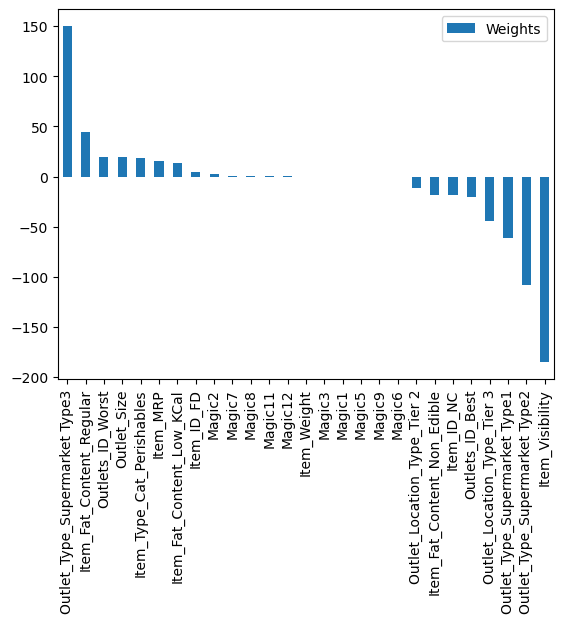

In [103]:
# Visualizing the Weights
weights.sort_values(by = "Weights",
                    ascending = False).plot(kind = "bar")

<Axes: >

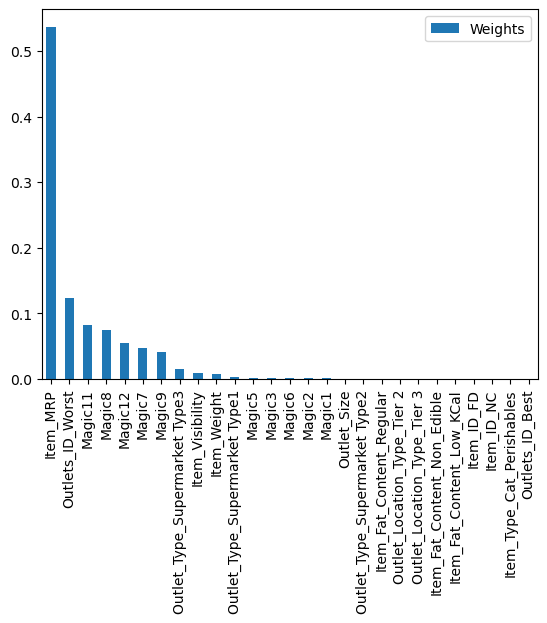

In [104]:
# Analysis of Weights
weights = pd.DataFrame(gbm.feature_importances_,
                       columns = ["Weights"], index = dummyx.columns)

# Visualizing the Weights

weights.sort_values(by = "Weights",
                    ascending = False).plot(kind = "bar")

In [105]:
# Ridge Regression
from sklearn.linear_model import Lasso, Ridge
# Machine Instance
ridge = Ridge(alpha = 0.1)
pred = ridge.fit(dummyx, y).predict(dummytest)

<Axes: >

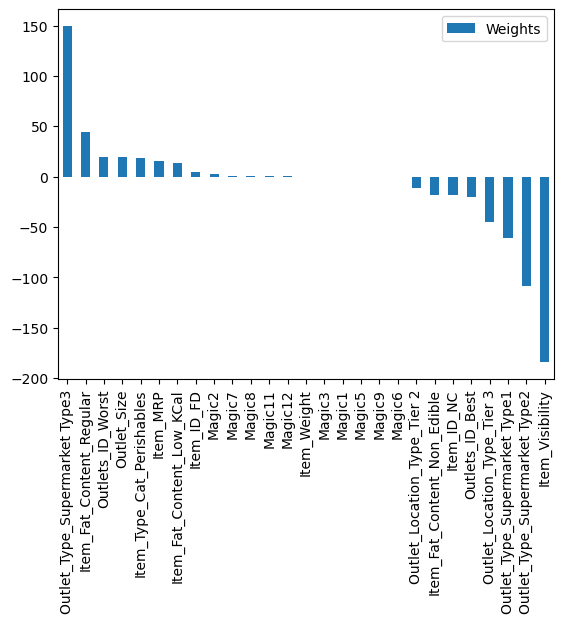

In [106]:
pd.DataFrame(ridge.coef_, columns = ["Weights"], index = dummyx.columns).\
sort_values(ascending = False, by = "Weights").plot(kind = "bar")


In [107]:
ridge = Ridge(alpha = 10)
pred = ridge.fit(dummyx, y).predict(dummytest)

<Axes: >

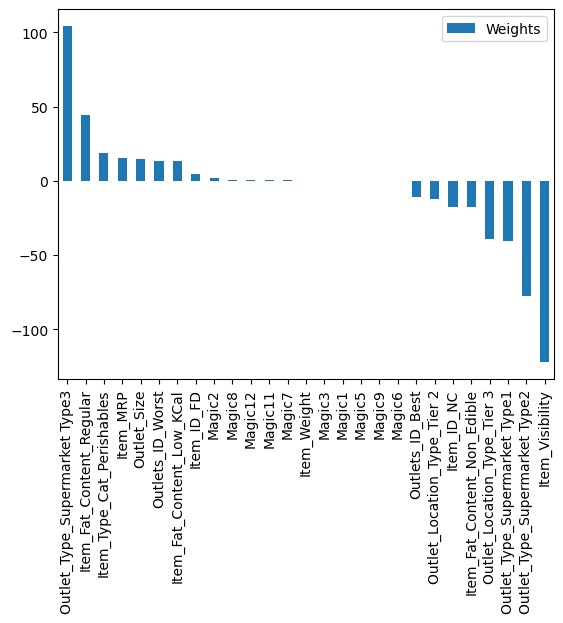

In [108]:
pd.DataFrame(ridge.coef_, columns = ["Weights"], index = dummyx.columns).\
sort_values(ascending = False, by = "Weights").plot(kind = "bar")

In [109]:
ridge = Ridge(alpha = 50)
pred = ridge.fit(dummyx, y).predict(dummytest)

<Axes: >

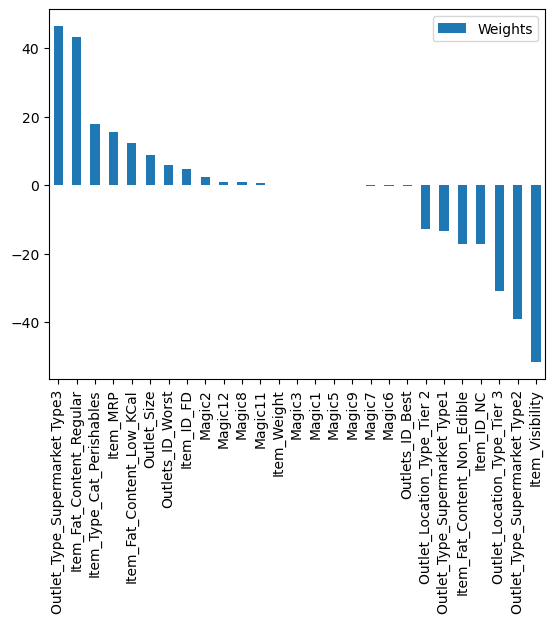

In [110]:
pd.DataFrame(ridge.coef_, columns = ["Weights"], index = dummyx.columns).\
sort_values(ascending = False, by = "Weights").plot(kind = "bar")

In [111]:
ridge = Ridge(alpha = 100)
pred = ridge.fit(dummyx, y).predict(dummytest)

<Axes: >

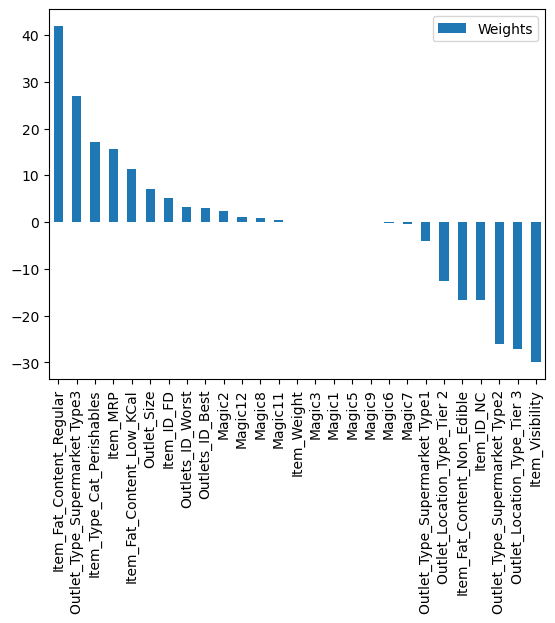

In [112]:
pd.DataFrame(ridge.coef_, columns = ["Weights"], index = dummyx.columns).\
sort_values(ascending = False, by = "Weights").plot(kind = "bar")

### Lasso Regression

In [113]:
lasso = Lasso(alpha = 1)
pred = lasso.fit(dummyx, y).predict(dummytest)

<Axes: >

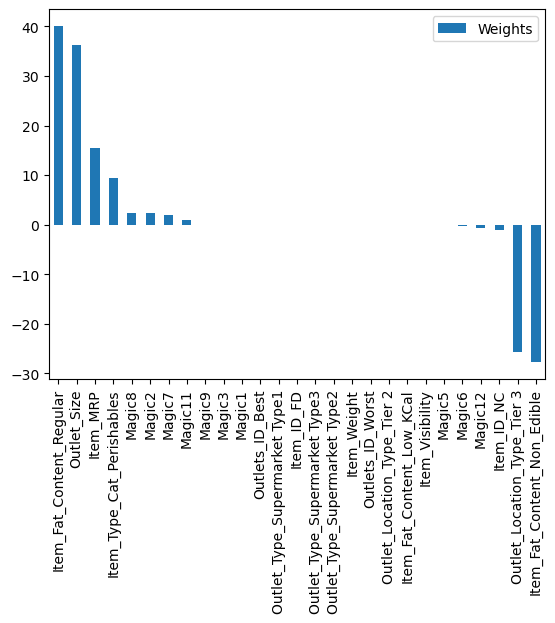

In [114]:
pd.DataFrame(lasso.coef_, columns = ["Weights"], index = dummyx.columns).\
sort_values(ascending = False, by = "Weights").plot(kind = "bar")

In [115]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = 10, l1_ratio = 1)

pred = enet.fit(dummyx, y).predict(dummytest)

<Axes: >

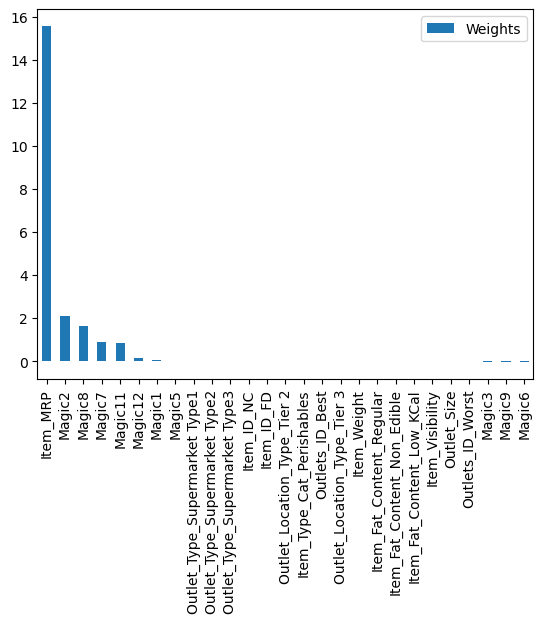

In [116]:
pd.DataFrame(enet.coef_, columns = ["Weights"], index = dummyx.columns).\
sort_values(ascending = False, by = "Weights").plot(kind = "bar")

## Parameter Tuning

1. Grid Search CV
2. Randomized Search CV



In [117]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

ridge = Ridge()
params = {"alpha":[7, 8, 9, 10, 20, 30, 50, 70, 75, 100]}
grid = GridSearchCV(estimator = ridge,param_grid = params,
                    cv = 5, n_jobs = -1,
                    scoring = "neg_root_mean_squared_error")

grid.fit(dummyx, y)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [7, 8, 9, 10, 20, 30, 50, 70, 75, 100]},
             scoring='neg_root_mean_squared_error')

In [118]:
grid.best_params_

{'alpha': 100}

In [119]:
ridge = Ridge()
params = {"alpha":[70, 75, 100, 125, 150, 175, 200]}
rcv = RandomizedSearchCV(estimator = ridge,param_distributions = params,
                    cv = 5, n_jobs = -1,
                    scoring = "neg_root_mean_squared_error")

rcv.fit(dummyx, y)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [70, 75, 100, 125, 150, 175,
                                                  200]},
                   scoring='neg_root_mean_squared_error')

In [120]:
rcv.best_params_

{'alpha': 200}

In [121]:
ridge = Ridge(alpha = 200)

pred = ridge.fit(dummyx, y).predict(dummytest)

<Axes: >

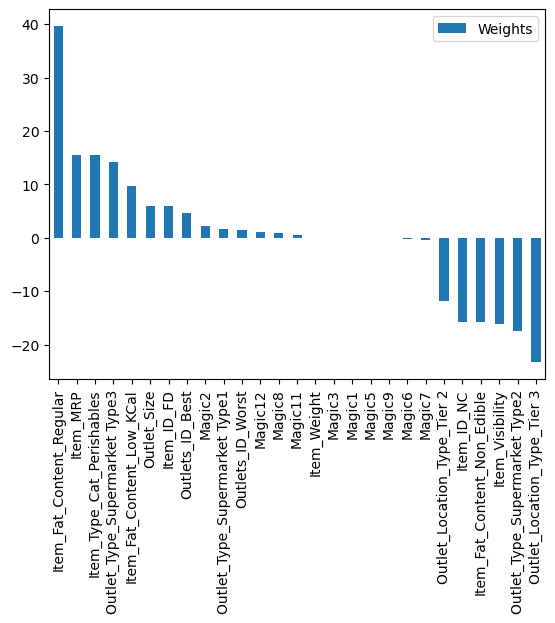

In [122]:
pd.DataFrame(ridge.coef_, columns = ["Weights"], index = dummyx.columns).\
sort_values(ascending = False, by = "Weights").plot(kind = "bar")

In [123]:
# Parameter Tuning for Lasso

lasso = Lasso()
params = {"alpha":[0.1, 0.01, 0.5, 0.9, 1, 2, 3, 5, 7, 9, 10, 25, 50]}
rcv = RandomizedSearchCV(estimator = lasso,
                         param_distributions = params,
                         cv = 5, n_jobs = -1,
                         scoring = "neg_root_mean_squared_error")

rcv.fit(dummyx, y)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.01, 0.5, 0.9, 1, 2, 3,
                                                  5, 7, 9, 10, 25, 50]},
                   scoring='neg_root_mean_squared_error')

In [124]:
rcv.best_params_

{'alpha': 50}

In [125]:
lasso = Lasso(alpha = 25)
pred = lasso.fit(dummyx, y).predict(dummytest)

<Axes: >

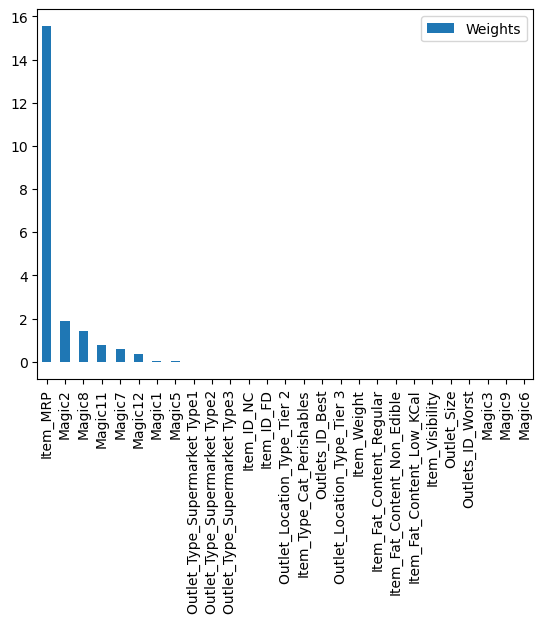

In [126]:
pd.DataFrame(lasso.coef_, columns = ["Weights"], index = dummyx.columns).\
sort_values(ascending = False, by = "Weights").plot(kind = "bar")

In [128]:
lasso = Lasso()
params = {"alpha":[0.1, 0.01, 0.5, 0.9, 1, 2, 3, 5, 7, 9, 10, 25, 50] }
gridsearch = GridSearchCV(estimator = lasso,
                         param_grid = params,
                         cv = 5, n_jobs = -1,
                         scoring = "neg_root_mean_squared_error")

gridsearch.fit(dummyx, y)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.5, 0.9, 1, 2, 3, 5, 7, 9, 10,
                                   25, 50]},
             scoring='neg_root_mean_squared_error')

In [129]:
gridsearch.best_params_

{'alpha': 50}

### Cross Validation

* KFold Cross Validation
* Stratified K Fold Cross Validation
* LOOCV (Leave One Out cv)

In [130]:
# KFold Cross Validation

from sklearn.model_selection import KFold
kfold = KFold(n_splits = 100, shuffle = True, random_state = 42)
lr = LinearRegression()
pred = []

for train_index, test_index in kfold.split(dummyx, y):
  xtrain = dummyx.iloc[train_index]
  ytrain = y.iloc[train_index]
  #xtest = dummyx.iloc[test_index]
  #ytest = y.iloc[test_index]
  pred.append(lr.fit(xtrain, ytrain).predict(dummytest))

In [131]:
finalpred = pd.DataFrame(pred).T.mean(axis = 1)

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                           "Outlet_Identifier":test.Outlet_Identifier,
                           "Item_Outlet_Sales": np.abs(finalpred)})